# Project : Analyzing the trends of COVID-19

### Problem Statement:
Given data about COVID-19 patients, write code to visualize the impact and
analyze the trend of rate of infection and recovery as well as make predictions
about the number of cases expected a week in future based on the current
trends.

#### Dataset:
CSV file containing data about the number of COVID-19 confirmed
deaths and recovered patients both around the world and in India.
#### Guidelines:
- Use pandas to accumulate data from multiple data files.
- Use visualization library to create interactive visualizations.
- Use Facebook prophet library to make time series models.
- Visualize the prediction by combining these technologies.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')


In [90]:
df= pd.read_csv('covid_19_clean_complete.csv')
df.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [92]:
df['Date']= pd.to_datetime(df['Date'])

In [93]:
df['Date'].head()

0   2020-01-22
1   2020-01-22
2   2020-01-22
3   2020-01-22
4   2020-01-22
Name: Date, dtype: datetime64[ns]

In [94]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [95]:
df.duplicated().sum()

0

In [96]:
df['Province/State'].dtypes

dtype('O')

# Exploratory Data Analysis

In [97]:
for col in df.columns:
    if df[col].dtypes == 'O':
        print(f'{col} column having number of unique values: {df[col].nunique()}' )
        print(df[col].value_counts()) 
        print()

Province/State column having number of unique values: 78
Australian Capital Territory    188
Yunnan                          188
Mayotte                         188
Guadeloupe                      188
French Polynesia                188
                               ... 
Guizhou                         188
Guangxi                         188
Guangdong                       188
Gansu                           188
Saint Pierre and Miquelon       188
Name: Province/State, Length: 78, dtype: int64

Country/Region column having number of unique values: 187
China             6204
Canada            2256
France            2068
United Kingdom    2068
Australia         1504
                  ... 
Holy See           188
Honduras           188
Hungary            188
Iceland            188
Lesotho            188
Name: Country/Region, Length: 187, dtype: int64

WHO Region column having number of unique values: 6
Europe                   15040
Western Pacific          10340
Africa                   

### Total Covid Cases by WHO Region from 2020-01-22 to 2020-07-27

In [98]:
df.groupby('WHO Region').sum()

,Lat,Long,Confirmed,Deaths,Recovered,Active
WHO Region,,,,,,
Africa,4727.394420,1.417872e+05,21791827,439978,11193730,10158119
Americas,161412.174448,-6.703710e+05,402261194,19359292,157069444,225832458
Eastern Mediterranean,108204.921108,1.697810e+05,74082892,1924029,48050703,24108160
Europe,567986.485104,1.032586e+05,248879793,19271040,123202075,106406678
South-East Asia,26161.732764,1.757034e+05,55118365,1458134,30030327,23629904
Western Pacific,183217.578356,1.234324e+06,26374411,932430,18861950,6580031


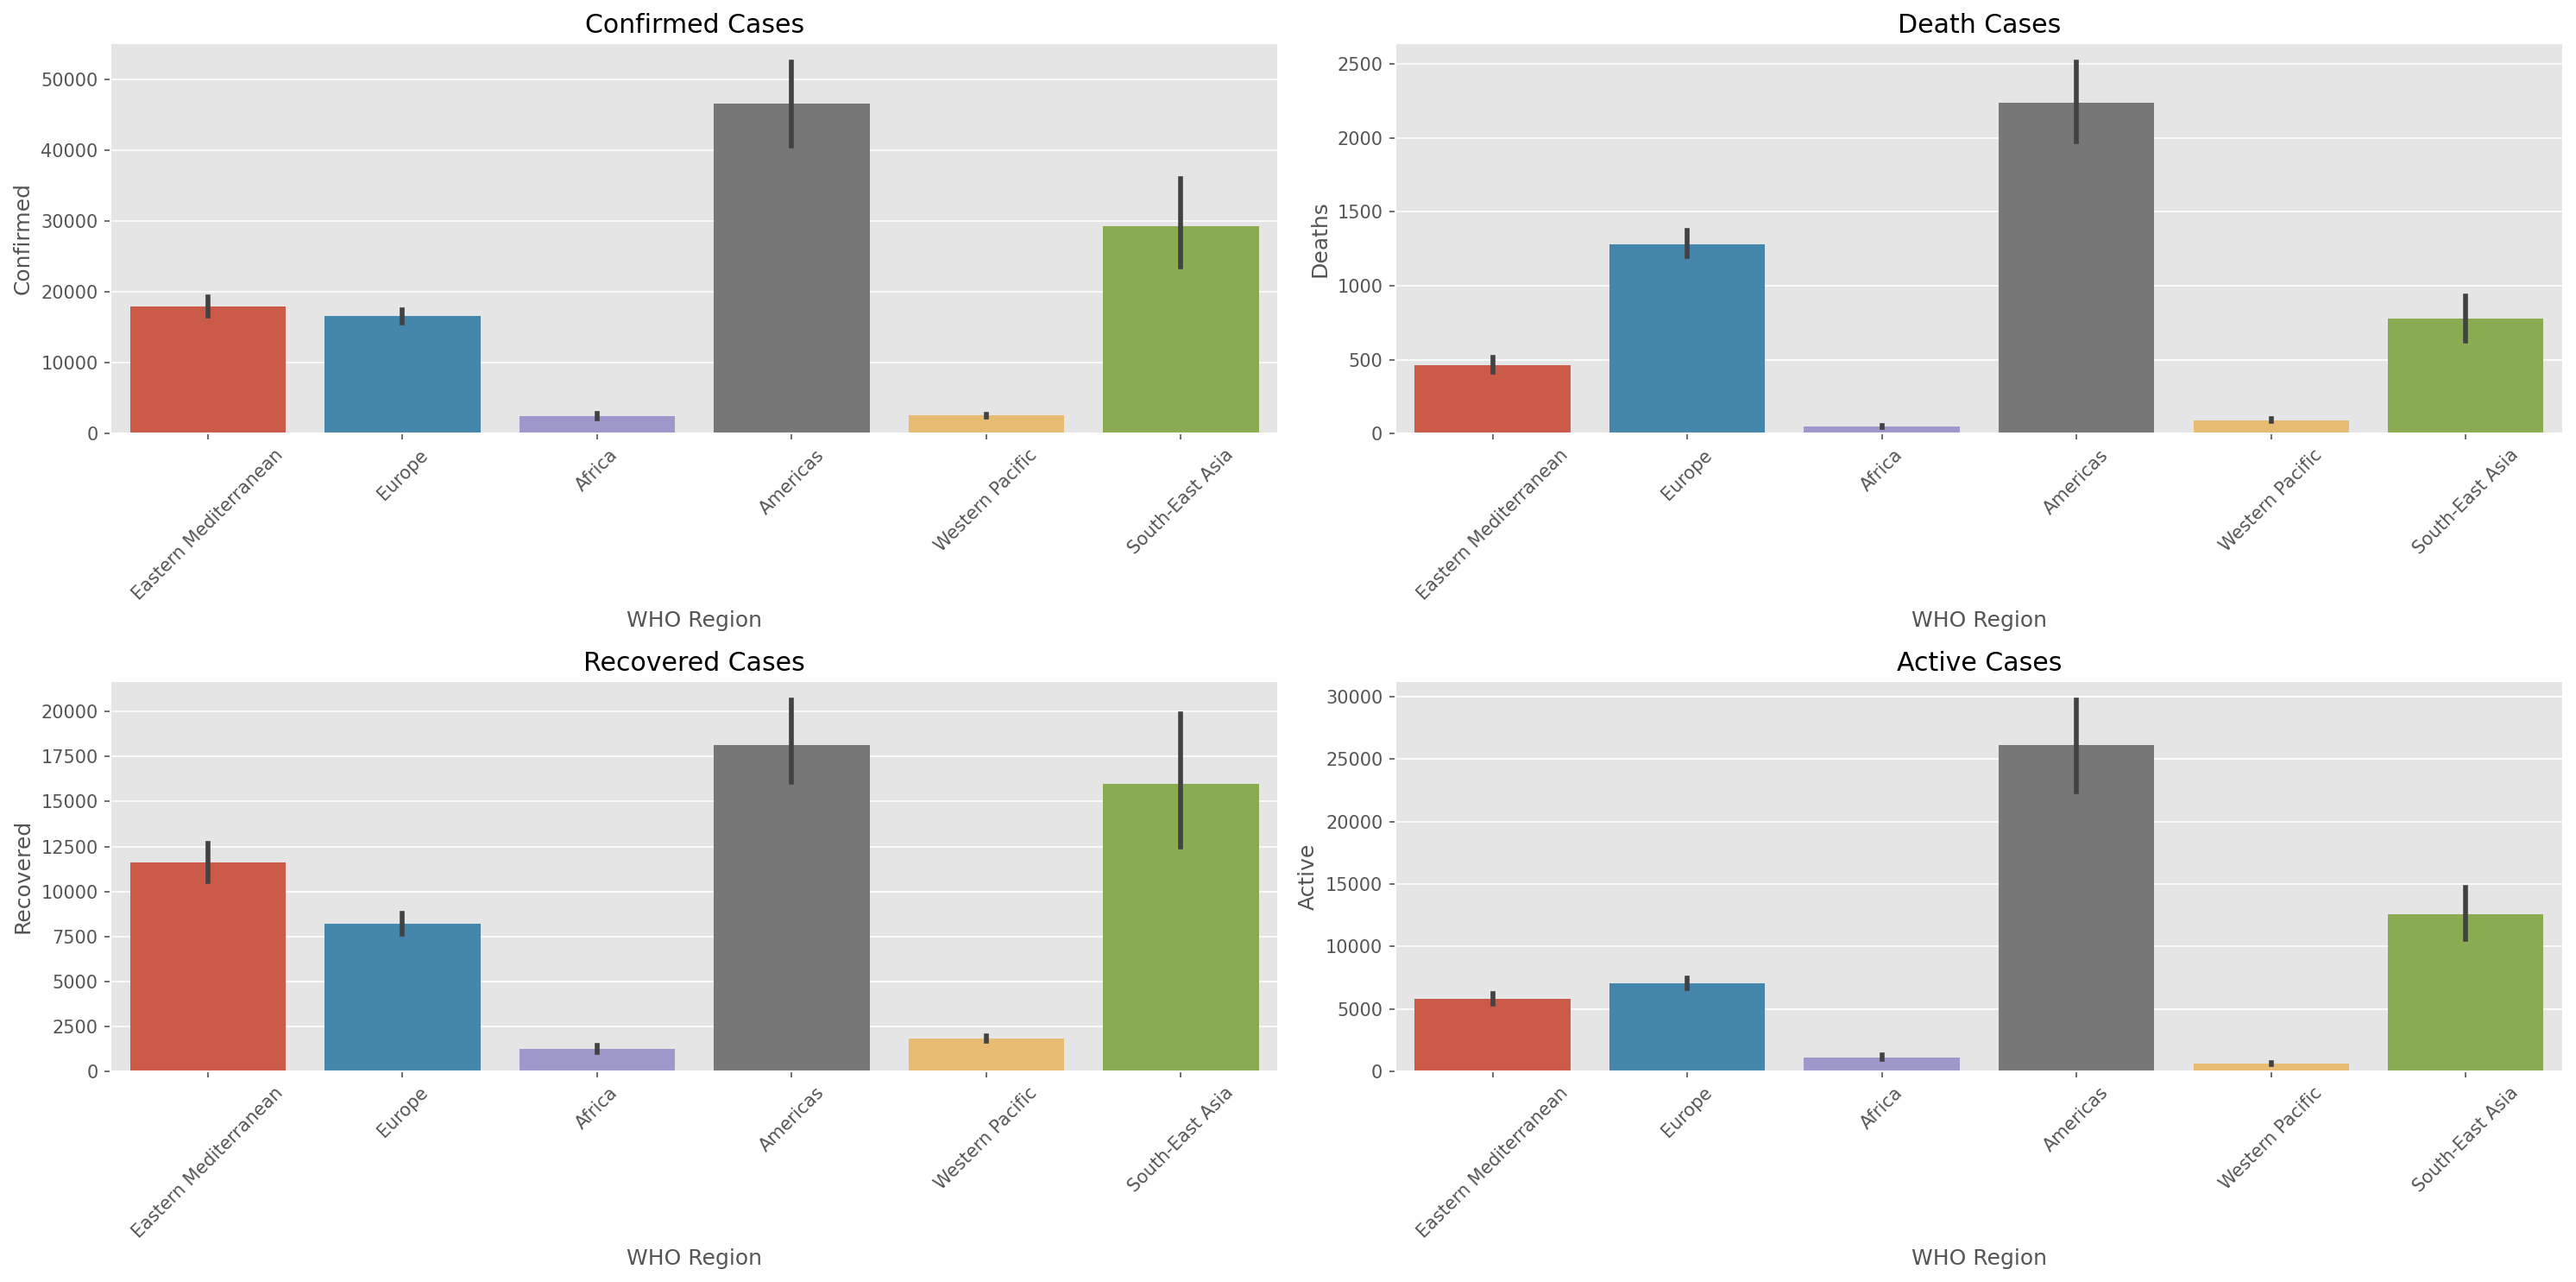

In [99]:
plt.figure(figsize= (20,10), dpi= 150)
plt.tight_layout()

plt.subplot(2,2,1)
plt.title('Confirmed Cases')
sns.barplot(x=df['WHO Region'], y= df['Confirmed'])
plt.xticks(rotation= 45)
plt.tight_layout()

plt.subplot(2,2,2)
plt.title('Death Cases')
sns.barplot(x=df['WHO Region'], y= df['Deaths'])
plt.xticks(rotation= 45)
plt.tight_layout()

plt.subplot(2,2,3)
plt.title('Recovered Cases')
sns.barplot(x=df['WHO Region'], y= df['Recovered'])
plt.xticks(rotation= 45)
plt.tight_layout()

plt.subplot(2,2,4)
plt.title('Active Cases')
sns.barplot(x=df['WHO Region'], y= df['Active'])
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

#### Country List

In [100]:
country_list= list(set(df['Country/Region'].values))
country_list.sort()
country_list

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Hait

###  Choose a country from country_list to analyse the Covid Data of that Country

In [101]:
country= input('Choose a country from country_list: ')
country_cases = df[df['Country/Region']== country][['Date', 'Confirmed','Deaths', 'Recovered', 'Active']].set_index('Date')
country_cases

Choose a country from country_list: India


,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-01-22,0,0,0,0
2020-01-23,0,0,0,0
2020-01-24,0,0,0,0
2020-01-25,0,0,0,0
2020-01-26,0,0,0,0
...,...,...,...,...
2020-07-23,1288108,30601,817209,440298
2020-07-24,1337024,31358,849432,456234
2020-07-25,1385635,32060,885573,468002


Text(0.5, 1.0, 'Covid Cases Trend In India')

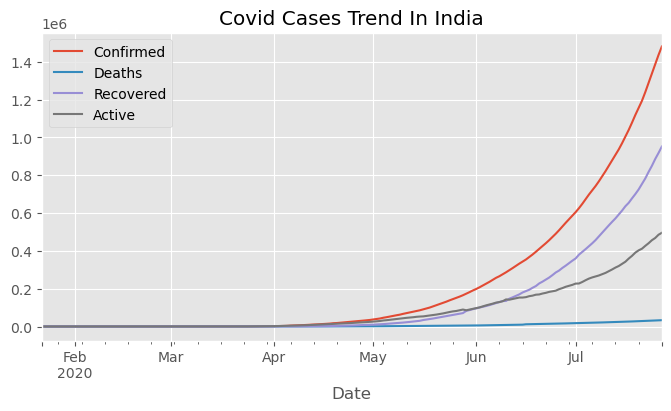

In [102]:
country_cases.plot(figsize= (8,4))
plt.title(f'Covid Cases Trend In {country}')

### Global Covid Cases

Text(0.5, 1.0, 'Global Covid Cases Trend')

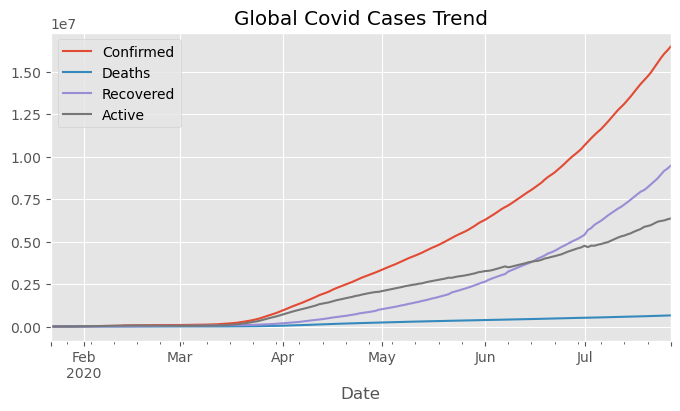

In [103]:
df.groupby('Date')[['Date', 'Confirmed','Deaths', 'Recovered', 'Active']].sum().plot(figsize= (8,4))
plt.title('Global Covid Cases Trend')

# Predictions and Forecasting of Covid19 Cases Using Facebook Prophet

In [106]:
data= df.groupby(['Date']).sum().loc[:,['Confirmed','Deaths','Recovered', 'Active']].reset_index()
data.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [107]:
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

# Global Forecasting

We switch off the daily component as we only have cases per day and not per hour so all cases are reported at midnight each day. That makes a daily variation useless.

Before you can start you need to rename the Date columns as ds (for timestamps) and Confirmed column as y for the target.

In [108]:
df_prophet= data.rename(columns={'Date': 'ds', 'Confirmed': 'y'})
df_prophet.tail()

,ds,y,Deaths,Recovered,Active
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711
187,2020-07-27,16480485,654036,9468087,6358362


In [109]:
# Make a future dataframe for X days
m_global = Prophet(changepoint_prior_scale=0.05,changepoint_range=0.95,
                      daily_seasonality=False, 
                      weekly_seasonality=True,
                     mcmc_samples=300)

In [110]:
# Add seasonlity
m_global.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [111]:
# fit the data
m_global.fit(df_prophet)

23:06:50 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

23:07:08 - cmdstanpy - INFO - CmdStan done processing.
23:07:08 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!
23:07:08 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 150 iterations at max treedepth (100.0%)
	Chain 2 had 149 iterations at max treedepth (99.3%)
	Chain 3 had 150 iterations at max treedepth (100.0%)
	Chai

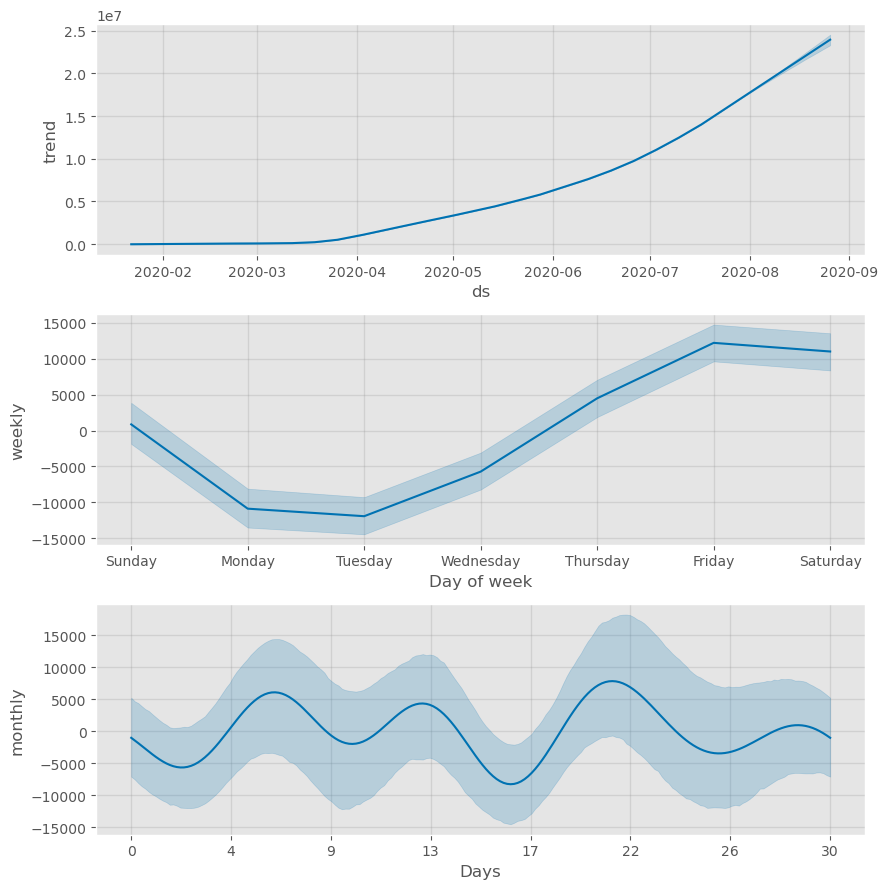

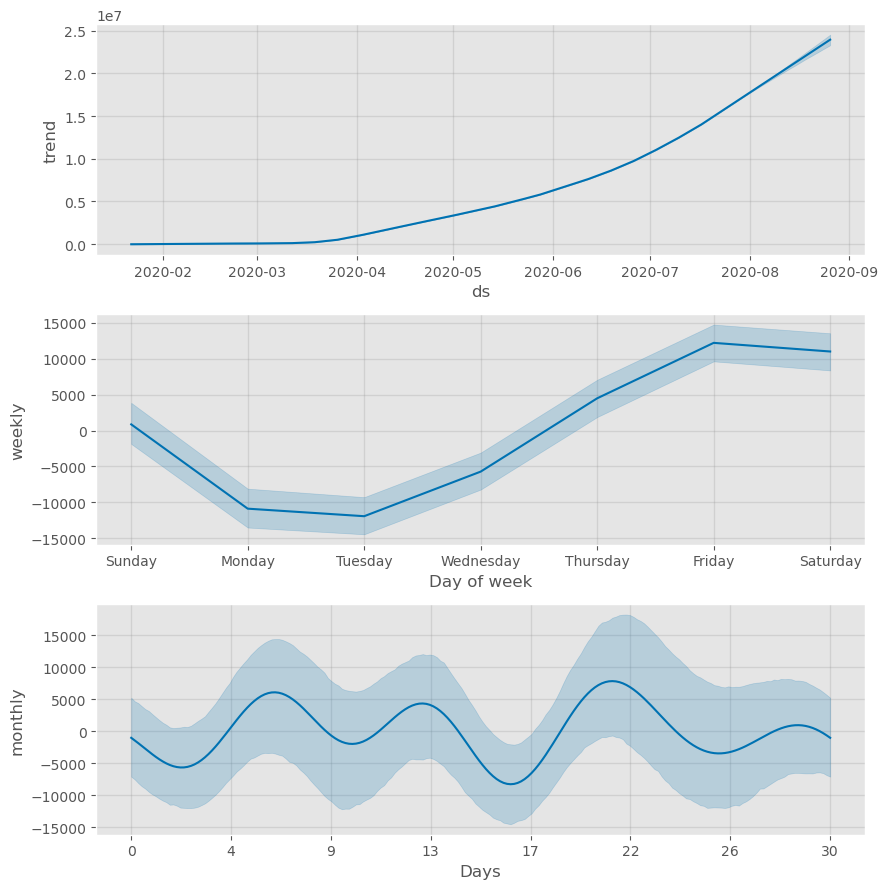

In [112]:
# Make predictions for next 30 days
future_global = m_global.make_future_dataframe(periods=30, freq='D')

forecast_global = m_global.predict(future_global)

m_global.plot_components(forecast_global)

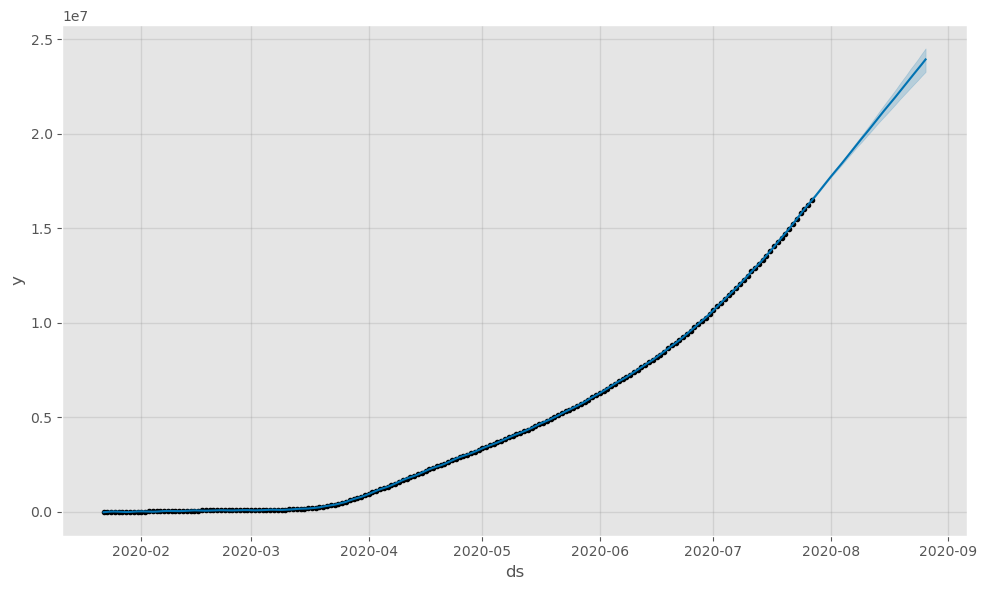

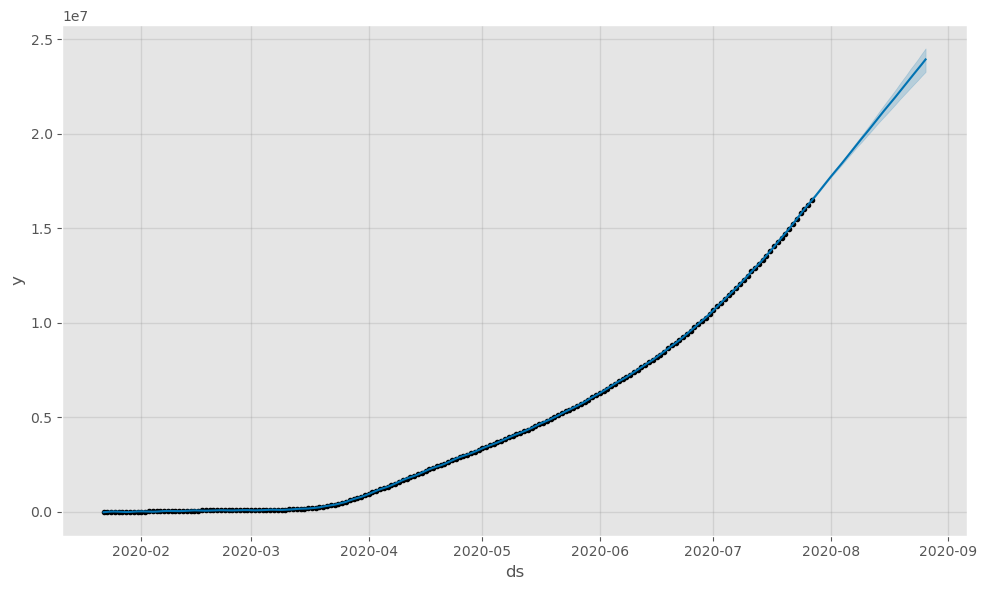

In [113]:
m_global.plot(forecast_global)

The prophet model identifies points at which the trend changes and those can be plotted.

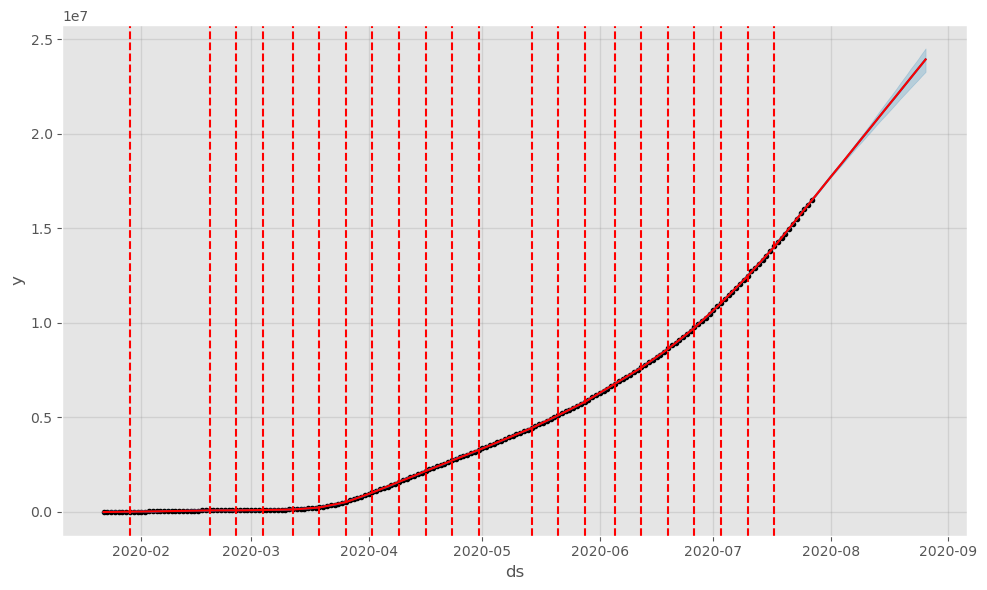

In [114]:
fig = m_global.plot(forecast_global)
a = add_changepoints_to_plot(fig.gca(), m_global, forecast_global)

## Global forecasting of covid cases for next one week 

In [115]:
forecast_global[len(data):].loc[:,['ds', 'yhat_lower' ,'yhat_upper', 'yhat']].iloc[:7]

,ds,yhat_lower,yhat_upper,yhat
188,2020-07-28,1.671715e+07,1.675239e+07,1.673477e+07
189,2020-07-29,1.696393e+07,1.700781e+07,1.698561e+07
190,2020-07-30,1.721473e+07,1.726471e+07,1.724176e+07
191,2020-07-31,1.746645e+07,1.752743e+07,1.749739e+07
192,2020-08-01,1.770817e+07,1.778218e+07,1.774578e+07
193,2020-08-02,1.793582e+07,1.803144e+07,1.798581e+07
194,2020-08-03,1.816257e+07,1.828404e+07,1.822336e+07


---
# Forecasting for a Country

In [123]:
country_list

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Hait

###  Choose a country from country_list to forecasting the covid cases

In [116]:
country= input('Choose a country from country_list: ')
total_country = df[df['Country/Region']== country]
total_country = total_country.groupby(['Date']).sum().loc[:,['Confirmed','Deaths','Recovered','Active']].reset_index()
total_country

Choose a country from country_list: India


,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1288108,30601,817209,440298
184,2020-07-24,1337024,31358,849432,456234
185,2020-07-25,1385635,32060,885573,468002
186,2020-07-26,1435616,32771,917568,485277


In [117]:
country_prophet= total_country.rename(columns={'Date': 'ds', 'Confirmed': 'y'})

# Make a future dataframe for X days
m_country = Prophet(changepoint_prior_scale=0.05,changepoint_range=0.95,
                      daily_seasonality=False, 
                      weekly_seasonality=True,
                     mcmc_samples=300)
# Add seasonlity
m_country.add_seasonality(name='monthly', period=30.5, fourier_order=5)

m_country.fit(country_prophet)


23:07:33 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

23:07:48 - cmdstanpy - INFO - CmdStan done processing.
23:07:48 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!
23:07:48 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 150 iterations at max treedepth (100.0%)
	Chain 2 had 150 iterations at max treedepth (100.0%)
	Chain 3 had 150 iterations at max treedepth (100.0%)


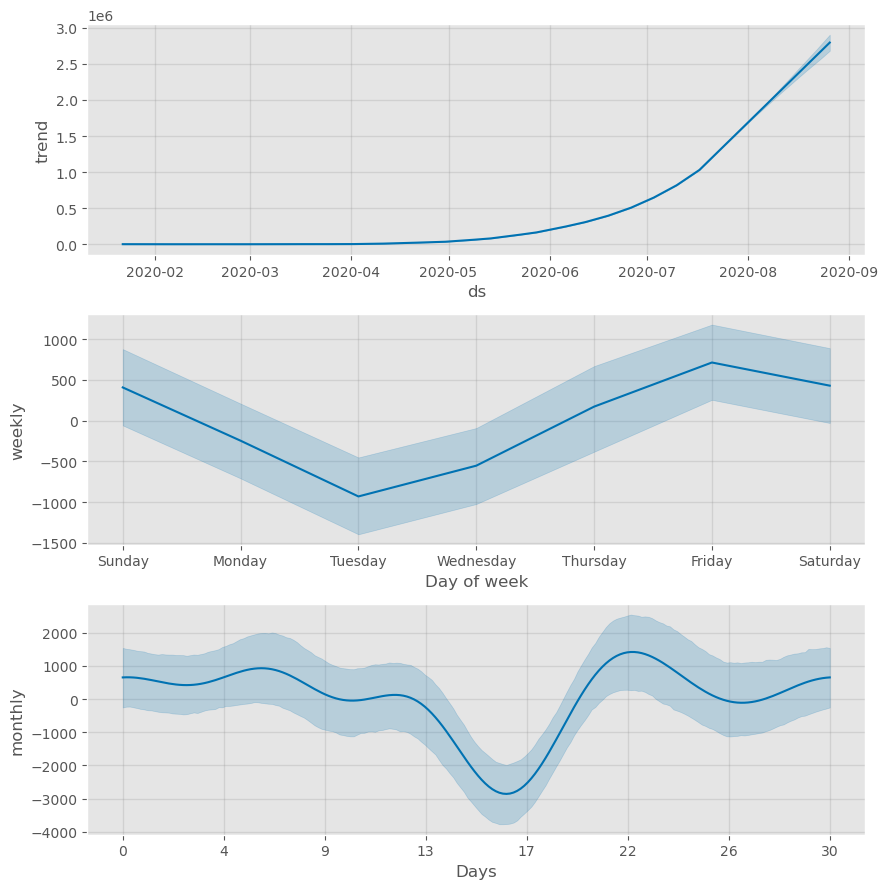

In [118]:
# Make predictions for next 30 days
future_country = m_country.make_future_dataframe(periods=30, freq='D')

forecast_country = m_country.predict(future_country)

m_country.plot_components(forecast_country);

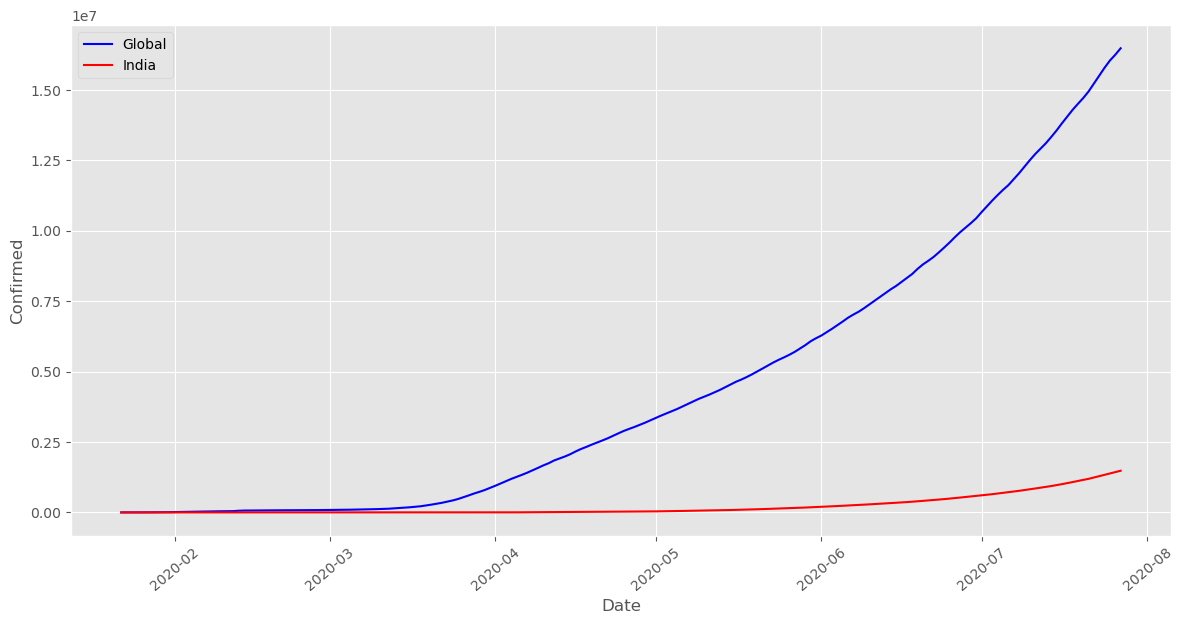

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Confirmed',color= 'blue',data = data, label='Global')
sns.lineplot(x='Date', y='Confirmed',color= 'red',data = total_country, label=f'{country}')

plt.legend()
plt.tight_layout()
plt.xticks(rotation=40)
plt.show()

In [120]:
print('Percentage of global cases in the Country: %s' %((total_country.Confirmed.sum()*100)/data.Confirmed.sum()))

Percentage of global cases in the Country: 4.9345860529162335


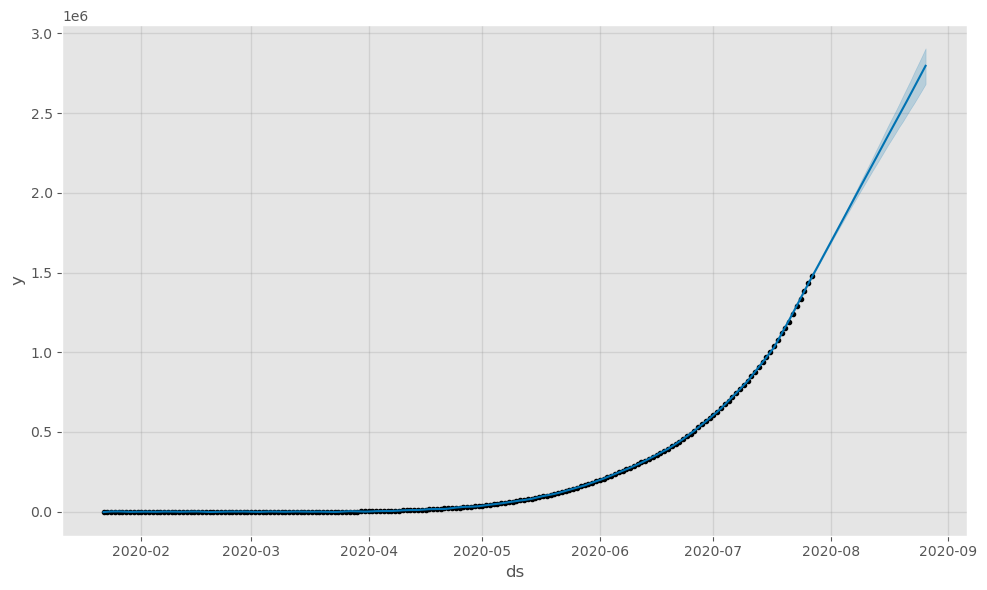

In [121]:
fig = m_country.plot(forecast_country)

## Forecasting covid cases for the next week of selected country 

In [131]:
forecast_country[len(total_country):].loc[:,['ds', 'yhat_lower' ,'yhat_upper', 'yhat']].iloc[:7]

,ds,yhat_lower,yhat_upper,yhat
188,2020-07-28,1.512836e+06,1.519183e+06,1.515997e+06
189,2020-07-29,1.556342e+06,1.563828e+06,1.560081e+06
190,2020-07-30,1.600212e+06,1.608835e+06,1.604490e+06
191,2020-07-31,1.643692e+06,1.653670e+06,1.648877e+06
192,2020-08-01,1.686419e+06,1.698979e+06,1.692696e+06
193,2020-08-02,1.729572e+06,1.745154e+06,1.737020e+06
194,2020-08-03,1.771384e+06,1.791060e+06,1.780825e+06
